In [1]:
import os,sys
root_dir=os.path.abspath(os.path.join(os.getcwd(),'..'))
sys.path.append(root_dir)

import torch
from torch import nn
from torch import optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader

from models.utils.discriminativ_loss import combined_loss
from models.FCN import ResNet,BasicBlock
from data.FER2013 import FER2013
from data.CK_plus import CK_plus
from data.utils import merger,augmentations

from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from torchvision import transforms as tf

In [5]:
# load model
model=ResNet(BasicBlock,[2,2,2,2],7)
model=torch.load("/mnt/e/Programming_Projects/CLDV_PRACTICAL/CVDL_Practical/training/trained_models/fcn/08_01__01_25_37/model/model.pth")
model=model.cuda()

torch.Size([1, 64, 64])
input image shape:torch.Size([1, 1, 64, 64])


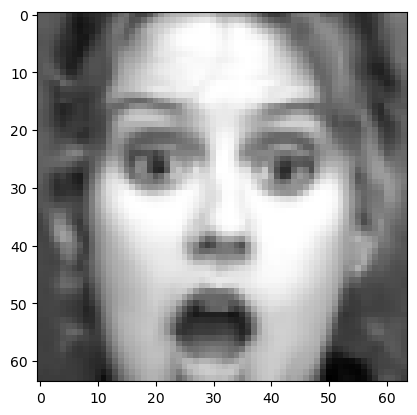

In [7]:
# using ckplus dataset
transform=tf.Compose([
    tf.Resize((64,64)),
    tf.Grayscale(),
    tf.ToTensor()
])
ds=CK_plus(transform=transform,split='test')

img=ds[4][0]
print(img.shape)
features,output=model(img.unsqueeze(0).cuda())
plt.imshow(img[0].numpy(),cmap='gray')


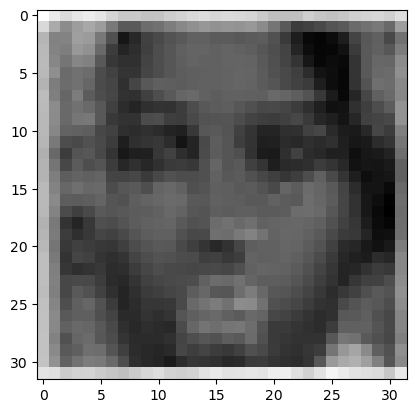

In [6]:
endimg.shape
plt.imshow(endimg.detach().cpu().numpy().squeeze().mean(axis=0),cmap='gray')

tensor([[1., 0., 0., 0., 0., 0.]])
input image shape:torch.Size([1, 1, 64, 64])
tensor([[1.0000e+00, 1.6483e-12, 1.9037e-15, 1.7296e-14, 2.7346e-13, 2.2999e-09]],
       grad_fn=<SoftmaxBackward0>)


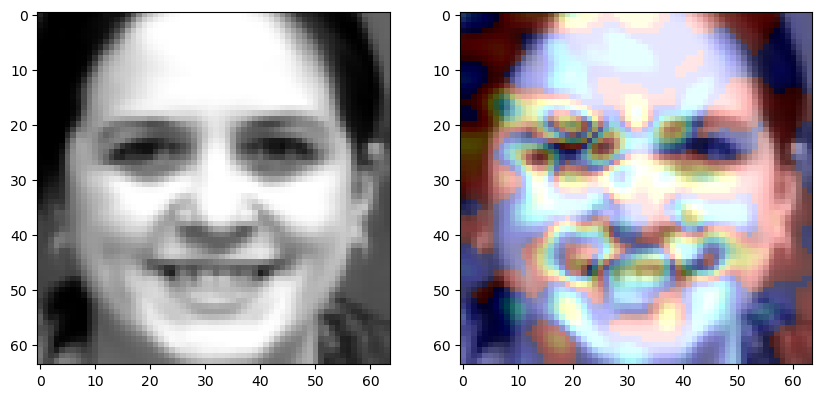

(64, 64, 3)

In [132]:


def visualize_gradients(model, img, label):
    import cv2
    import numpy as np
    from matplotlib import pyplot as plt

    # Ensure the image requires gradient
    img.requires_grad = True
    
    # Ensure the label, img, and model are on the same device
    img = img.to(model.parameters().__next__().device)
    label = label.to(model.parameters().__next__().device)
    

    # Zero the model gradients
    model.zero_grad()

    # Forward pass
    features, output = model(img)
    print(output)


    # Compute loss
    loss = torch.nn.CrossEntropyLoss()(output, label)

    # Backward pass
    loss.backward()

    # Get the gradients
    grad = img.grad

    # Smooth the grad
    grad = grad.squeeze().detach().cpu().numpy()
    grad = cv2.GaussianBlur(grad, (11, 11), 0)
    grad = grad / grad.max()
    grad = grad * 255
    grad = grad.astype(np.uint8)
    grad = cv2.applyColorMap(grad, cv2.COLORMAP_JET)
    grad = cv2.cvtColor(grad, cv2.COLOR_BGR2RGB)

    # Prepare the original image
    img = img.squeeze().detach().numpy()
    img = img * 255
    img = img.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Plot the images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[1].imshow(cv2.addWeighted(img, 0.9, grad, 0.3, 0))
    plt.show()
    
    return np.array(cv2.addWeighted(img, 0.9, grad, 0.3, 0))

# Call the function
img,lab=ds[33]
img=img.unsqueeze(0)
lab=lab.unsqueeze(0)
#lab=torch.argmax(model(img.unsqueeze(0).cuda())[1]).item()
print(lab)
visualize_gradients(model, img, lab).shape




In [13]:
img.grad